
1. Change the number of neurons in at least one layer
2. Add one or more layer to the model
3. Change the optimizer (hint: in our given set of parameters, RMSProp can
result in higher accuracy in less than 20 epochs, you can also try other optimizers)
4. (optional) Change batch size, epochs, learning rate as necessary. 
    

In [7]:
import keras
from keras.models import Sequential                 # import the sequential model, which is a core object in Keras
from keras.layers import Dense, Activation          # import the dense layer, AKA the fully connected layer
                                                    # and Keras' library of activation functions
from keras.optimizers import RMSprop                # import RMSprop as optimizer.Change the optimizer 

import pandas                                       # Data storage
from sklearn.model_selection import train_test_split# Splits dataset

In [8]:
dataset = pandas.read_csv("train.csv") # Read in data
dataset = dataset.as_matrix() # Convert to ndarray
X,y = dataset[:,1:], dataset[:,0] # Separate data points and labels

the shape of features is: (1024, 784)
the shape of labels is: (1024,)
the range of features is: nan to nan
the range of labels is: 0.0 to 9.0


/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


label 1 is 1.0
label 2 is 0.0
label 3 is 1.0
label 4 is 4.0
label 5 is 0.0


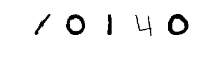

In [11]:

print ('the shape of features is:',X.shape)       #print data shape
print ('the shape of labels is:',y.shape)       #print data shape

import numpy as np
print ('the range of features is:',np.min(X),'to',np.max(X))
print ('the range of labels is:',np.min(y),'to',np.max(y))

import matplotlib.pyplot as plt
% matplotlib inline 
for i in range(5):
    image = X[i]
    plt.subplot(1,10, i+1)#绘制多个子图
    image = image.reshape(28,28)
    print ('label', i+1, 'is',y[i])
    plt.imshow(image, cmap='Greys')#显示灰度图像
    plt.axis('off')#关闭坐标刻度轴


In [12]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.20) # Split data将数组或矩阵分解成随机序列和测试子集

x_train = x_train/255.0                           # normalize training data
x_val = x_val/255.0                             # normalize testing data

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_val = keras.utils.to_categorical(y_val, num_classes=10)

In [13]:
batch_size = 256
epochs = 300
learning_rate = 0.001

# build the model
model = Sequential()                                         # define model to be sequential
model.add(Dense(256, activation='relu',input_dim=784))       # first hidden layer with 256 neurons input_dim输入图像的size
model.add(Dense(256, activation='relu'))                     # second hidden layer with 256 neurons
model.add(Dense(20,activation='sigmoid'))                    #Change the number of neurons in at least one layer&Add one or more layer to the model
model.add(Dense(10, activation='softmax')) # output layer
model.summary()                                              # print out summary for all layers 


my_optimizer = keras.optimizers.RMSprop(lr=learning_rate)                   # using learning rate 0.001
model.compile(optimizer=my_optimizer,                        # using SGD with our set lr as optimizer
              loss='categorical_crossentropy',               # using cross entropy loss
              metrics=['accuracy'])                          # metric that is called during evaluation

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 20)                5140      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
Total params: 272,102
Trainable params: 272,102
Non-trainable params: 0
_________________________________________________________________


In [14]:
best_weights_filepath = './best_weights.hdf5' ##define the filename to store
                                            ##the best performance and weights
earlyStopping = keras.callbacks.EarlyStopping(monitor='val_acc',
                                              patience = 199) 
#Stop training early if val_acc doesn't improve for 5 epochs

SaveBestWeights = keras.callbacks.ModelCheckpoint(best_weights_filepath,
                                                  monitor='val_acc',
                                                  save_best_only=True)
# store the historically best performing weights in best_weights_filepath
#, where performance is given by accuracy on the validation set.


model_history = model.fit(x_train, y_train,                   # training data 
                    batch_size=batch_size,                   # batch size 256
                    epochs=epochs,                           # 300 epochs 
                    verbose= 2,                              # verbose level
                    validation_data = (x_val, y_val),  #Use the previously defined x_test as a validation set. 
                    callbacks = [earlyStopping, SaveBestWeights]
                         )     
model.load_weights(best_weights_filepath) ##Set the best performing weights to the model

Train on 819 samples, validate on 205 samples
Epoch 1/300
 - 0s - loss: nan - acc: 0.1026 - val_loss: nan - val_acc: 0.1122
Epoch 2/300
 - 0s - loss: nan - acc: 0.1026 - val_loss: nan - val_acc: 0.1122
Epoch 3/300
 - 0s - loss: nan - acc: 0.1026 - val_loss: nan - val_acc: 0.1122
Epoch 4/300
 - 0s - loss: nan - acc: 0.1026 - val_loss: nan - val_acc: 0.1122
Epoch 5/300
 - 0s - loss: nan - acc: 0.1026 - val_loss: nan - val_acc: 0.1122
Epoch 6/300
 - 0s - loss: nan - acc: 0.1026 - val_loss: nan - val_acc: 0.1122
Epoch 7/300
 - 0s - loss: nan - acc: 0.1026 - val_loss: nan - val_acc: 0.1122
Epoch 8/300
 - 0s - loss: nan - acc: 0.1026 - val_loss: nan - val_acc: 0.1122
Epoch 9/300
 - 0s - loss: nan - acc: 0.1026 - val_loss: nan - val_acc: 0.1122
Epoch 10/300
 - 0s - loss: nan - acc: 0.1026 - val_loss: nan - val_acc: 0.1122
Epoch 11/300
 - 0s - loss: nan - acc: 0.1026 - val_loss: nan - val_acc: 0.1122
Epoch 12/300
 - 0s - loss: nan - acc: 0.1026 - val_loss: nan - val_acc: 0.1122
Epoch 13/300
 -

Epoch 105/300
 - 0s - loss: nan - acc: 0.1026 - val_loss: nan - val_acc: 0.1122
Epoch 106/300
 - 0s - loss: nan - acc: 0.1026 - val_loss: nan - val_acc: 0.1122
Epoch 107/300
 - 0s - loss: nan - acc: 0.1026 - val_loss: nan - val_acc: 0.1122
Epoch 108/300
 - 0s - loss: nan - acc: 0.1026 - val_loss: nan - val_acc: 0.1122
Epoch 109/300
 - 0s - loss: nan - acc: 0.1026 - val_loss: nan - val_acc: 0.1122
Epoch 110/300
 - 0s - loss: nan - acc: 0.1026 - val_loss: nan - val_acc: 0.1122
Epoch 111/300
 - 0s - loss: nan - acc: 0.1026 - val_loss: nan - val_acc: 0.1122
Epoch 112/300
 - 0s - loss: nan - acc: 0.1026 - val_loss: nan - val_acc: 0.1122
Epoch 113/300
 - 0s - loss: nan - acc: 0.1026 - val_loss: nan - val_acc: 0.1122
Epoch 114/300
 - 0s - loss: nan - acc: 0.1026 - val_loss: nan - val_acc: 0.1122
Epoch 115/300
 - 0s - loss: nan - acc: 0.1026 - val_loss: nan - val_acc: 0.1122
Epoch 116/300
 - 0s - loss: nan - acc: 0.1026 - val_loss: nan - val_acc: 0.1122
Epoch 117/300
 - 0s - loss: nan - acc: 0

In [15]:
testset = pandas.read_csv("text.csv")             # Read data
testset = testset.as_matrix()                     # Convert to ndarray
testset = testset/255.0                             # normalize testing data
predictions = model.predict_classes(testset)           # Predict

FileNotFoundError: File b'text.csv' does not exist